# AV Behavior in ghost_cutin with Reduced Friction

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import scipy.stats
from scipy.stats import norm, binom, poisson
from dtaidistance import dtw

import json

## Testing Parameters
- cloudiness = 100
- precipitation = 100
- **precipitation_deposits = 100**    
- sun_altitude_angle = 5
- sun_azimuth_angle = 0
- **wetness = 100**
- fog_density = 30
- wind_intensity = 70

## Reduced Friction Setup

### Layered folders, parse into 2d lists of dicts

In [2]:
import os

txt_lists = []
for root, dirs, files in os.walk("./Data/Friction Rain"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists.append(json_object)

### Examining results

In [3]:
count = 0
for txt in txt_lists:
    if txt['_checkpoint']['records'][0]['status'] == 'Completed':
        count += 1

print("Average complete ratio:", count/100)

Average complete ratio: 1.0


In [4]:
count = 0
for txt in txt_lists:
    count += txt['_checkpoint']['records'][0]['scores']['score_route']   
print("Average score route:", count/100)

Average score route: 100.0


### Setting up into 2d lists of DataFrames

In [5]:
df_array = np.empty(100, dtype=object)

for i in range(len(df_array)):
    df_array[i] = pd.DataFrame()

In [6]:
dir_path = './Data/Friction Rain'

# list to store files
res = []

# Iterate directory
run_index = 0
for path in os.listdir(dir_path):
    # check if current path is a file
    if not os.path.isfile(os.path.join(dir_path, path)):
        df = pd.DataFrame()
        for file in os.listdir(os.path.join(dir_path, path)):
            file_path = os.path.join(dir_path, os.path.join(path, file))
            
            if "_ctl.csv" in file_path:
                df = pd.read_csv(file_path)
            elif "_cvip.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)
            elif "_traj.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)

        df_array[run_index] = df
        run_index += 1

In [7]:
df_array[0]

,ts,agent_id,throttle,steer,brake,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z,ts,agent_id,x,y,z,v
0,291905,0,0.900000,-0.021996,0.0,291905,0,500.497261,198.767441,-95.832657,-499.788727,291905,0,192.362411,-86.262680,0.576039,0.000000
1,291906,0,0.900000,-0.003608,0.0,291906,0,5.598742,195.567444,-90.832657,0.100000,291906,0,192.362411,-86.262680,0.534733,0.000000
2,291907,0,0.900000,-0.003004,0.0,291907,0,5.595580,195.567444,-90.832657,0.095407,291907,0,192.362411,-86.262680,0.487313,0.000000
3,291908,0,0.900000,-0.001938,0.0,291908,0,5.592744,195.567444,-90.832657,0.084691,291908,0,192.362411,-86.262680,0.433781,0.000000
4,291909,0,0.900000,-0.000677,0.0,291909,0,5.590235,195.567444,-90.832657,0.067854,291909,0,192.362411,-86.262680,0.374139,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,292692,0,0.464959,-0.004117,0.0,292692,0,50.645825,192.611008,93.792107,-0.068173,292692,0,193.181519,43.149517,-0.021046,8.827251
788,292693,0,0.443359,-0.003297,0.0,292693,0,50.757453,192.607147,94.124283,-0.068173,292693,0,193.178162,43.370064,-0.021043,8.821585
789,292694,0,0.300473,-0.003195,0.0,292694,0,50.869303,192.603271,94.456512,-0.068174,292694,0,193.174896,43.590443,-0.021042,8.814446
790,292695,0,0.388461,-0.002975,0.0,292695,0,50.981369,192.599426,94.788788,-0.068175,292695,0,193.171753,43.810654,-0.021040,8.807747


## Unmodified Friction Setup

### Layered folders, parse into 2d lists of dicts

In [8]:
txt_lists_orig = []
for root, dirs, files in os.walk("./Data/Rain/Simulations Rain PC/campaign_results_new/route_highway_epoch24_rain-sunset-100_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists_orig.append(json_object)

### Examining results

In [9]:
count = 0
for txt in txt_lists_orig:
    if txt['_checkpoint']['records'][0]['status'] == 'Completed':
        count += 1

print("Average complete ratio:",count/100)

Average complete ratio: 1.0


In [10]:
count = 0
for txt in txt_lists_orig:
    count += txt['_checkpoint']['records'][0]['scores']['score_route']   
print("Average score route:",count/100)

Average score route: 100.0


### Setting up into 2d lists of DataFrames

In [11]:
df_array_orig = np.empty(100, dtype=object)

for i in range(len(df_array_orig)):
    df_array_orig[i] = pd.DataFrame()

In [12]:
dir_path = './Data/Rain/Simulations Rain PC/campaign_results_new/route_highway_epoch24_rain-sunset-100_fi_ghost_cutin'

# list to store files
res = []

# Iterate directory
run_index = 0
for path in os.listdir(dir_path):
    # check if current path is a file
    if not os.path.isfile(os.path.join(dir_path, path)):
        df = pd.DataFrame()
        for file in os.listdir(os.path.join(dir_path, path)):
            file_path = os.path.join(dir_path, os.path.join(path, file))
            
            if "_ctl.csv" in file_path:
                df = pd.read_csv(file_path)
            elif "_cvip.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)
            elif "_traj.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)

        df_array_orig[run_index] = df
        run_index += 1

In [13]:
df_array_orig[0]

,ts,agent_id,throttle,steer,brake,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z,ts,agent_id,x,y,z,v
0,2177908,0,0.900000,-0.019394,0.0,2177908,0,500.491189,198.767441,-95.832657,-499.819366,2177908,0,192.362411,-86.262680,0.539326,0.000000
1,2177909,0,0.900000,-0.002667,0.0,2177909,0,5.595580,195.567444,-90.832657,0.100000,2177909,0,192.362411,-86.262680,0.491906,0.000000
2,2177910,0,0.900000,-0.004700,0.0,2177910,0,5.592365,195.567444,-90.832657,0.095407,2177910,0,192.362411,-86.262680,0.438374,0.000000
3,2177911,0,0.900000,0.003541,0.0,2177911,0,5.589578,195.567444,-90.832657,0.084691,2177911,0,192.362411,-86.262680,0.378732,0.000000
4,2177912,0,0.900000,-0.000345,0.0,2177912,0,5.587154,195.567444,-90.832657,0.069311,2177912,0,192.362411,-86.262680,0.312981,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2178664,0,0.417004,-0.001579,0.0,2178664,0,56.217592,192.540756,99.219635,0.001842,2178664,0,193.197006,43.005882,0.033955,8.958640
757,2178665,0,0.329465,-0.001539,0.0,2178665,0,56.325781,192.534561,99.551483,0.001838,2178665,0,193.194366,43.229576,0.033963,8.945382
758,2178666,0,0.284043,-0.001386,0.0,2178666,0,56.434533,192.527802,99.883591,0.001834,2178666,0,193.191757,43.452972,0.033970,8.933998
759,2178667,0,0.269944,-0.001319,0.0,2178667,0,56.543857,192.520477,100.216011,0.001830,2178667,0,193.189163,43.676117,0.033975,8.924150


## Comparison

### Since no accident, check cvip

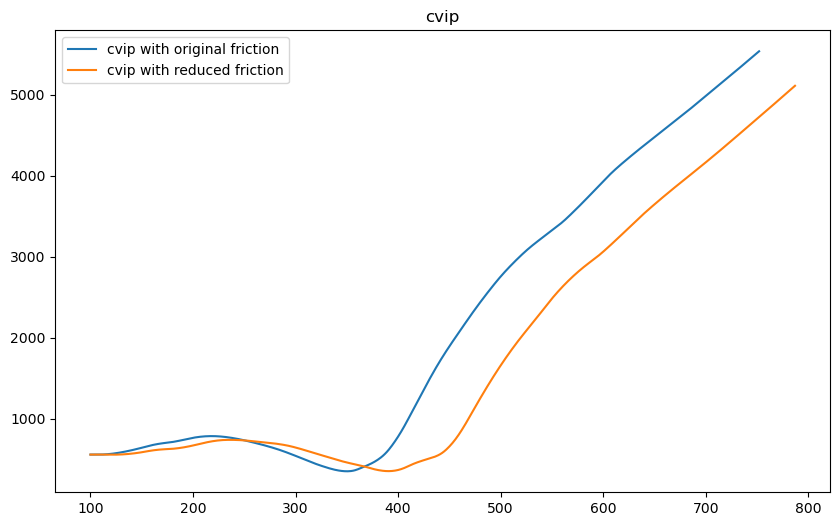

In [14]:
plt.figure(figsize=(10,6))

df_avg_orig_cvip = df_array_orig[0]['cvip']
count = 0

for i in range(1, len(df_array_orig)):
    if(df_array_orig[i]['cvip'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['cvip'].isnull().values.any():
            df_avg_orig_cvip+=df_array_orig[i]['cvip']
            count+=1
df_avg_orig_cvip.interpolate().dropna()/count



df_avg_cvip = df_array[0]['cvip']

count = 0
for i in range(1, len(df_array)):
    if(df_array[i]['cvip'].dtypes == 'object'):
        print(i)
    else:
        if not df_array[i]['cvip'].isnull().values.any():
            df_avg_cvip+=df_array[i]['cvip']
            count+=1
df_avg_cvip.interpolate().dropna()/count

df_avg_orig_cvip.iloc[100:].plot(title="cvip")
df_avg_cvip.iloc[100:].plot()
plt.legend(["cvip with original friction", "cvip with reduced friction"])

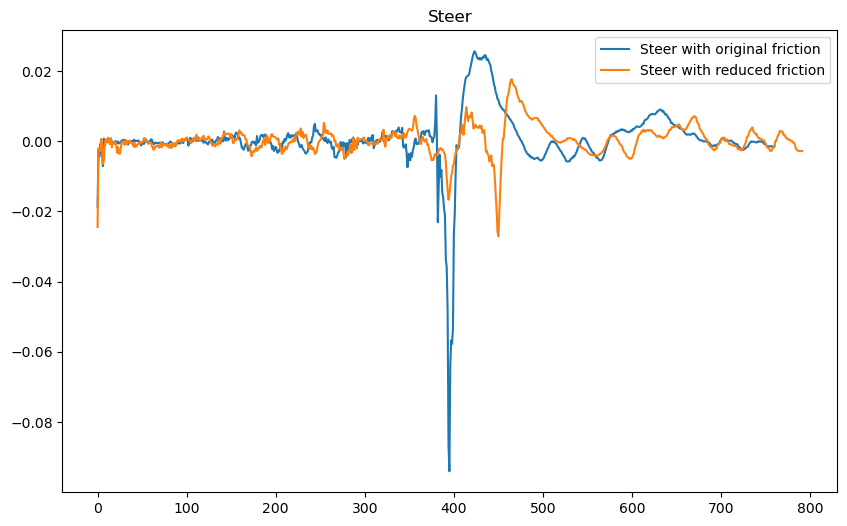

In [15]:
plt.figure(figsize=(10,6))

df_avg_orig = df_array_orig[0]['steer']
for i in range(1, len(df_array_orig)): 
    df_avg_orig += df_array_orig[i]['steer']
df_avg_orig = df_avg_orig.interpolate().dropna()/100
df_avg_orig.plot()

df_avg = df_array[0]['steer']
for i in range(1, len(df_array)): 
    df_avg += df_array[i]['steer']
df_avg = df_avg.interpolate().dropna()/100
df_avg.plot()


plt.title("Steer")
plt.legend(["Steer with original friction", "Steer with reduced friction"])
plt.show()

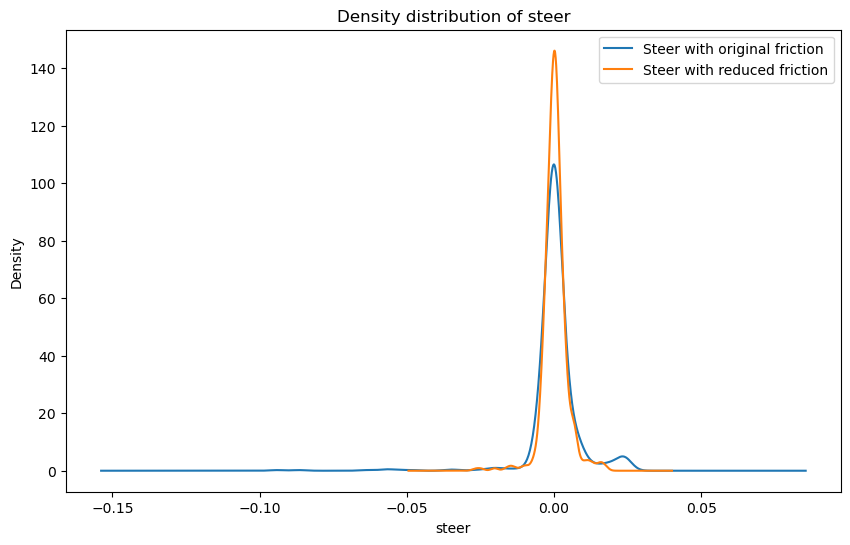

In [16]:
fig = plt.figure(figsize=(10, 6))


df_avg_orig.plot.density()
df_avg.plot.density()

plt.xlabel("steer")
plt.title('Density distribution of steer')

plt.legend(["Steer with original friction", "Steer with reduced friction"])

plt.show()

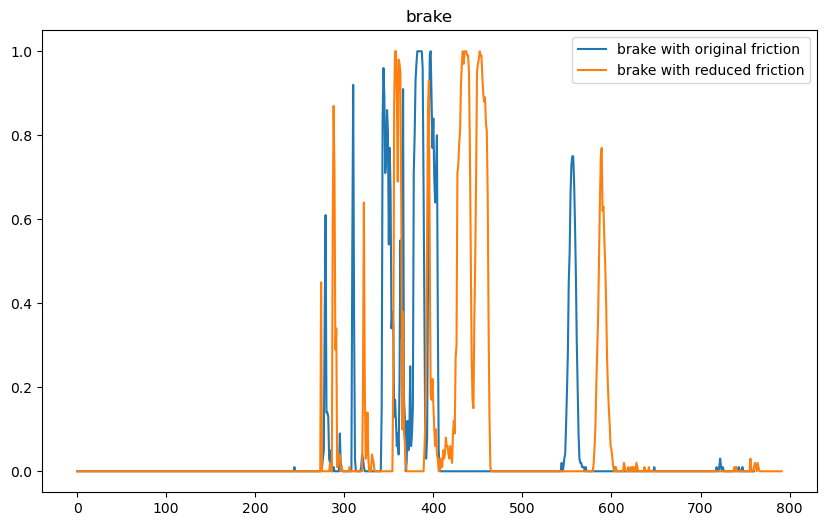

In [17]:
plt.figure(figsize=(10,6))

df_avg_orig = df_array_orig[0]['brake']
for i in range(1, len(df_array_orig)): 
    df_avg_orig += df_array_orig[i]['brake']
df_avg_orig = df_avg_orig.interpolate().dropna()/100
df_avg_orig.plot()

df_avg = df_array[0]['brake']
for i in range(1, len(df_array)): 
    df_avg += df_array[i]['brake']
df_avg = df_avg.interpolate().dropna()/100
df_avg.plot()


plt.title("brake")
plt.legend(["brake with original friction", "brake with reduced friction"])
plt.show()

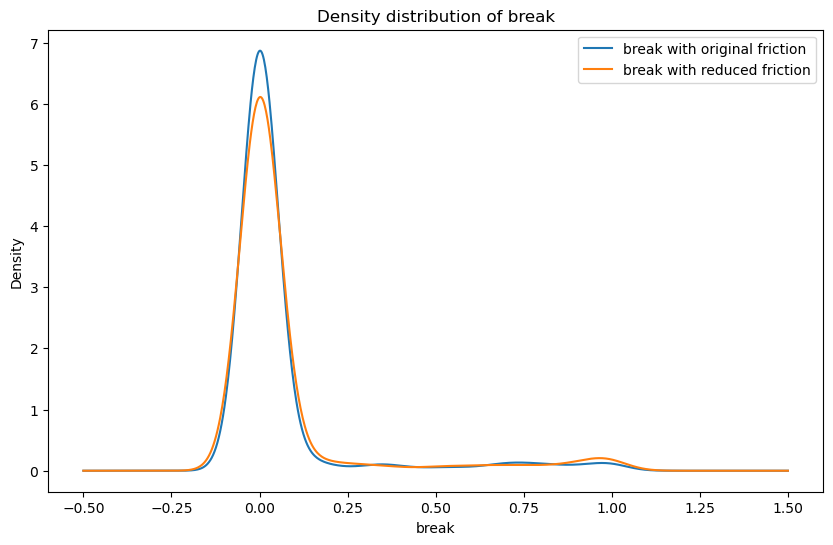

In [18]:
fig = plt.figure(figsize=(10, 6))


df_avg_orig.plot.density()
df_avg.plot.density()

plt.xlabel("break")
plt.title('Density distribution of break')

plt.legend(["break with original friction", "break with reduced friction"])

plt.show()

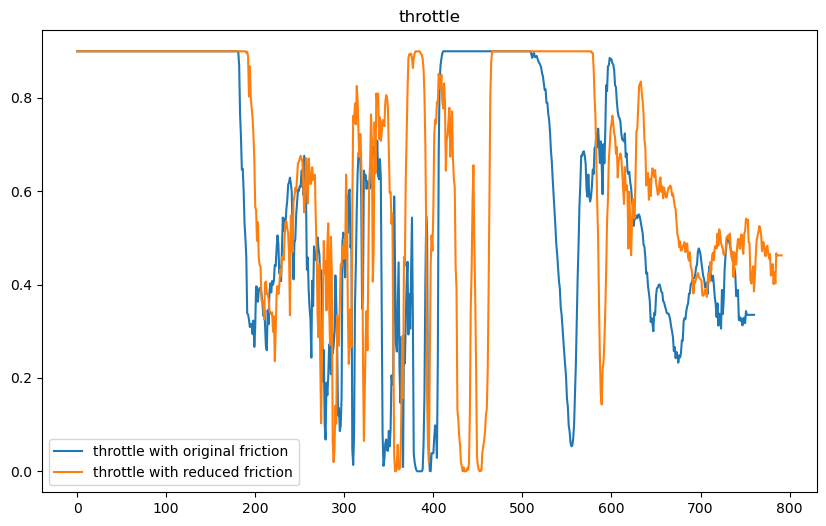

In [19]:
plt.figure(figsize=(10,6))

df_avg_orig = df_array_orig[0]['throttle']
for i in range(1, len(df_array_orig)): 
    df_avg_orig += df_array_orig[i]['throttle']
df_avg_orig = df_avg_orig.interpolate().dropna()/100
df_avg_orig.plot()

df_avg = df_array[0]['throttle']
for i in range(1, len(df_array)): 
    df_avg += df_array[i]['throttle']
df_avg = df_avg.interpolate().dropna()/100
df_avg.plot()


plt.title("throttle")
plt.legend(["throttle with original friction", "throttle with reduced friction"])
plt.show()

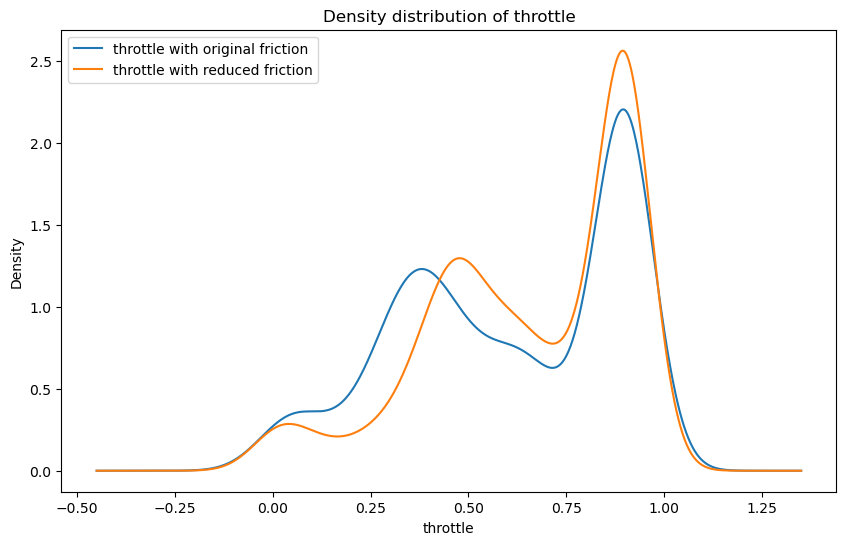

In [20]:
fig = plt.figure(figsize=(10, 6))


df_avg_orig.plot.density()
df_avg.plot.density()

plt.xlabel("throttle")
plt.title('Density distribution of throttle')

plt.legend(["throttle with original friction", "throttle with reduced friction"])

plt.show()

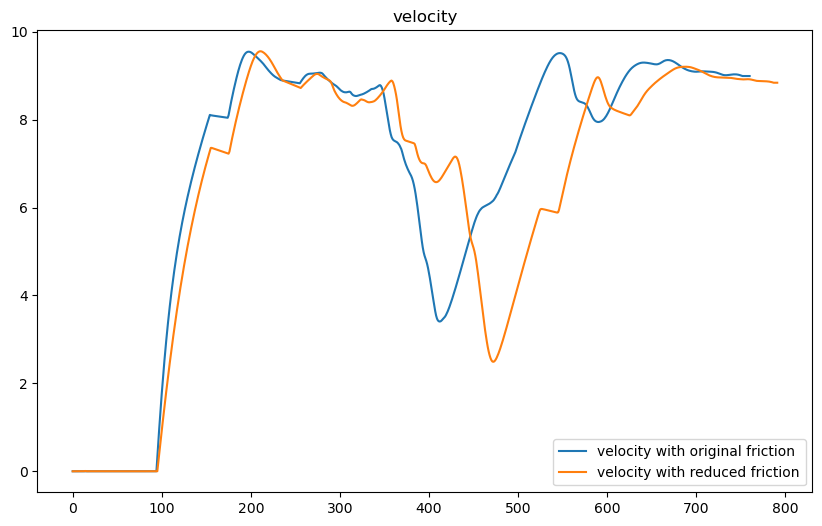

In [21]:
plt.figure(figsize=(10,6))

df_avg_orig = df_array_orig[0]['v']
for i in range(1, len(df_array_orig)): 
    df_avg_orig += df_array_orig[i]['v']
df_avg_orig = df_avg_orig.interpolate().dropna()/100
df_avg_orig.plot()

df_avg = df_array[0]['v']
for i in range(1, len(df_array)): 
    df_avg += df_array[i]['v']
df_avg = df_avg.interpolate().dropna()/100
df_avg.plot()


plt.title("velocity")
plt.legend(["velocity with original friction", "velocity with reduced friction"])
plt.show()

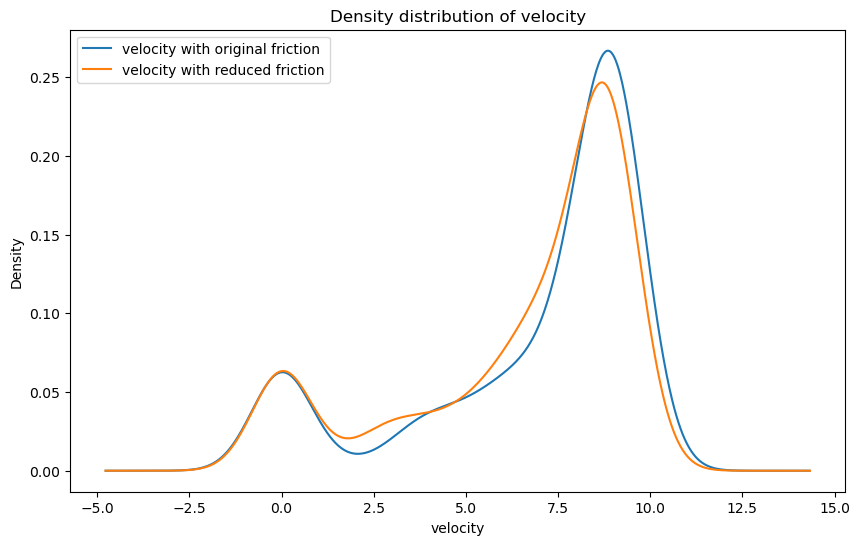

In [22]:
fig = plt.figure(figsize=(10, 6))


df_avg_orig.plot.density()
df_avg.plot.density()

plt.xlabel("velocity")
plt.title('Density distribution of velocity')

plt.legend(["velocity with original friction", "velocity with reduced friction"])

plt.show()

## Dynamic time warping (DTW) for cvip
### measuring similarity between two temporal sequences

In [23]:
distance = dtw.distance(df_avg_orig_cvip, df_avg_cvip)

In [24]:
distance

nan

## KS Test for cvip

In [25]:
import scipy as sp

In [26]:
sp.stats.ks_2samp(df_avg_orig_cvip, df_avg_cvip)

KstestResult(statistic=0.12902845803634239, pvalue=4.2177381979173086e-06, statistic_location=741.6077406786436, statistic_sign=-1)

You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level.
**pvalue=4.2177381979173086e-06**